In [2]:
'''
线性回归：完整版（自己封装函数） + 简洁版（调用torch中已封装的函数）
'''

import torch
from time import time
a = torch.ones(1000)
b = torch.ones(1000)

In [3]:
start = time()
c = torch.zeros(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
print(time() - start)


0.016967058181762695


In [4]:
start = time()
d = a + b
print(time() - start)

0.0


In [5]:
a = torch.ones(3)
b = 10
print(a + b)

tensor([11., 11., 11.])


In [6]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random
from d2lzh_pytorch.utils import *

num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs,
                       dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)

In [7]:
print(features[0], labels[0])


tensor([-1.0191, -0.3070]) tensor(3.2134)


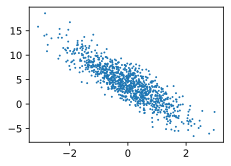

In [8]:
set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

In [9]:
batch_size = 10
# data_iter()函数：随机抽取batch_size个features和labels
# X对应features y对应labels
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


tensor([[-0.3235, -0.0323],
        [ 0.1405, -0.9812],
        [-1.1529,  0.5263],
        [-0.3878,  0.0895],
        [-0.3155,  0.8287],
        [ 0.6295,  0.3479],
        [ 0.2000, -0.1808],
        [ 0.1844, -0.7536],
        [-0.6794, -0.4560],
        [ 0.5742,  0.1859]]) tensor([3.6768, 7.8273, 0.1138, 3.1269, 0.7533, 4.2886, 5.2192, 7.1348, 4.3938,
        4.7267])


In [10]:
# 初始化模型的w和b值
# 将权重初始化为均值为0 标准差为0.01的正态随机数
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32) # 偏差初始化为0

In [11]:
# 这些参数需要求梯度进行迭代
w.requires_grad_(True)
b.requires_grad_(True)

tensor([0.], requires_grad=True)

In [12]:
lr = 0.03
num_epochs = 3  # 迭代周期数
net = linreg  # 线性回归矢量计算
loss = squared_loss  # 损失函数

In [13]:
for epoch in range(num_epochs):
    # 进行第epoch次迭代
    for X, y in data_iter(batch_size, features, labels):
        # net(X, w, b) => 为y_hat 预测值
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()
        sgd([w, b], lr, batch_size)  # 随机梯度下降
        # 梯度清零 不清零的话 下次求梯度会累加
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)  # 该是迭代得到的loss
    print("epoch %d, loss %f" % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.043018
epoch 2, loss 0.000182
epoch 3, loss 0.000056


In [16]:
print(true_w, '\n', w)
print(true_b, '\n', b)


'''
线性回归 简洁实现
'''

[2, -3.4] 
 tensor([[ 1.9992],
        [-3.4010]], requires_grad=True)
4.2 
 tensor([4.1995], requires_grad=True)


In [17]:
# 生成数据集
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)
# 读取数据 pytorch提供了data包来读取数据
import torch.utils.data as Data
batch_size = 10
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features, labels)
# 随机读取小批量
data_iter = Data.DataLoader(dataset, batch_size,shuffle=True)

In [24]:
for X, y in data_iter:
    print(X, y)
    break

100


In [25]:
# nn => neural networks
# nn的核心数据结构是Module
# 一个nn.Module实例应该包含一些层以及返回输出的前向传播（forward）方法

# 定义神经网络层
import torch.nn as nn
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)
    # forward 定义向前传播
    def forward(self, x):
        y = self.linear(x)
        return y

net = LinearNet(num_inputs)
print(net)

# 下面的三种写法效果与上面一致
# 写法一：
# net = nn.Sequential(
#     nn.Linear(num_inputs, 1)
# )
# print(net)
# print(net[0])
# 写法二：
# net = nn.Sequential()
# net.add_module('linear', nn.Linear(num_inputs, 1))
# # net.add_module ......
# print(net)
# print(net[0])
# 写法三：
# from collections import OrderedDict
# net = nn.Sequential(OrderedDict([
#     ('linear', nn.Linear(num_inputs, 1))
#     # ......
# ]))
# print(net)
# print(net[0])

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [29]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.1889,  0.2097]], requires_grad=True)
Parameter containing:
tensor([-0.6661], requires_grad=True)


In [30]:
# 初始化
from torch.nn import init
init.normal_(net[0].weight, mean=0, std=0.01)  # 将net[0]的weight 初始化为服从均值为0 标准差为0.01正太分布
init.constant_(net[0].bias, val=0)

Parameter containing:
tensor([0.], requires_grad=True)

In [31]:
# 定义损失函数
loss = nn.MSELoss()

In [32]:
# 优化模型
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.03)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [34]:
# 训练模型
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad() # 梯度清零，等价于net.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))


epoch 1, loss: 0.000032
epoch 2, loss: 0.000076
epoch 3, loss: 0.000134


In [35]:
# 查看训练好的模型得到的w，b值
dense = net[0]
print(true_w, dense.weight)
print(true_b, dense.bias)

[2, -3.4] Parameter containing:
tensor([[ 2.0001, -3.4005]], requires_grad=True)
4.2 Parameter containing:
tensor([4.1996], requires_grad=True)
